I've been given a new task to study how scale dependent bias varias as a function of HOD params and 

In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np
from scipy.stats import binned_statistic, linregress

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
colors = sns.color_palette()

In [4]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [5]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.81120]}

In [6]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [7]:
cat.load(0.81120, tol = 0.01, HOD='hsabRedMagic', particles = False)#, hod_kwargs = {'sec_haloprop_key':'halo_log_nfw_conc'})#, hod_kwargs={'split': 0.5})

In [8]:
chain_fname = '/u/ki/swmclau2/des/SherlockPearceMCMC/500_walkers_5000_steps_chain_wt_alt_redmagic_z0.23_part2.npy'
chain = np.genfromtxt(chain_fname)

In [9]:
n_walkers = 500
n_params = chain.shape[1]
n_burn = 0
chain = chain[n_walkers*n_burn:, :]
print chain.shape

(2006500, 8)


In [10]:
ordered_param_names = param_names = ['logMmin','mean_occupation_centrals_assembias_param1', 'f_c', 'logM0', 'sigma_logM',
                                     'mean_occupation_satellites_assembias_param1',     'logM1',   'alpha']

In [11]:
rbins = np.array([0.31622777, 0.44326829, 0.62134575, 0.87096359, 1.22086225, 1.7113283, 2.39883292, 3.36253386,\
                  4.71338954, 6.60693448, 9.26118728,  12.98175275, 18.19700859,  25.50742784,  35.75471605,  50.11872336])
rpoints = (rbins[1:]+rbins[:-1])/2

In [12]:
theta_bins = np.logspace(np.log10(2.5), np.log10(250), 21)/60 #binning used in buzzard mocks
tpoints = (theta_bins[1:]+theta_bins[:-1])/2

In [13]:
zbin = 1
wt_redmagic = np.loadtxt('/u/ki/swmclau2/Git/pearce/bin/mcmc/buzzard2_wt_%d%d.npy'%(zbin,zbin))

In [14]:
cov = np.loadtxt('/u/ki/swmclau2/Git/pearce/bin/mcmc/wt_11_cov.npy')

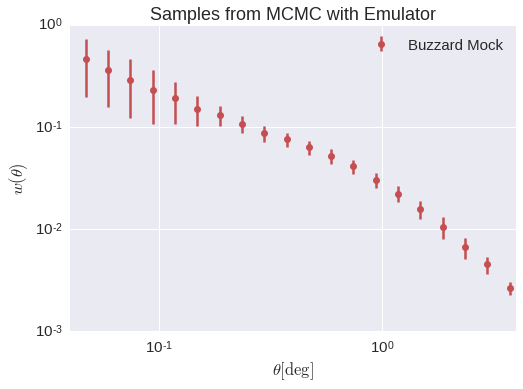

In [15]:
plt.errorbar(tpoints, wt_redmagic, yerr = np.sqrt(np.diag(cov)), fmt = 'o',
             capsize = 50, label = 'Buzzard Mock', color = colors[2])

plt.ylabel(r'$w(\theta)$')
plt.xlabel(r'$\theta \mathrm{[deg]}$')
plt.loglog();
plt.legend(loc='best')
plt.xlim([4e-2, 4])
plt.title("Samples from MCMC with Emulator")
plt.show()

In [ ]:
W = 0.00275848072207

In [ ]:
wts = []
indicies = np.random.choice(chain.shape[0], size = 500, replace = False)
for i, row in enumerate(chain[indicies]):
    print i
    hod_params = dict(zip(ordered_param_names, row))
    cat.populate(hod_params)
    wt = cat.calc_wt(theta_bins, rbins, W)
    wts.append(wt)
    #plt.plot(rbc, bias, alpha = 0.1, color = 'b')

In [ ]:
fig = plt.figure(figsize = (15, 6))
i = 0
for wt in wts:
    if i == 0:
        plt.plot(tpoints, wt, alpha = 0.05, color = colors[0], label = 'Posterior Samples')
        i+=1
    plt.plot(tpoints, wt, alpha = 0.05, color = colors[0])
    
plt.errorbar(tpoints, wt_redmagic, yerr = np.sqrt(np.diag(cov)), fmt = 'o',
            label = 'Buzzard Mock', color = colors[2])

plt.ylabel(r'$w(\theta)$')
plt.xlabel(r'$\theta \mathrm{[deg]}$')
plt.loglog();
plt.legend(loc='best')
plt.xlim([4e-2, 4])
#plt.title("Samples from MCMC with Emulator")
plt.show()